### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Assignment activity 1: Make predictions with regression

Turtle Games sources and sells Lego products across various countries. They want your help with determining the optimal price of products that would achieve maximum sales results.


## Objective

Determine the optimal price at which they should sell Lego products based on the number of Lego pieces in the Lego set and the age of the customer that the product is most likely to be purchased by. 

1. What price should be set for the Lego sets with 8,000 Lego pieces? 

2. What price should be set for the Lego sets with 8,000 Lego pieces that are most likely to be purchased by 30-year-old customers? 

In [54]:
#import all the necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

# 1. Import Data

In [43]:
# Import data
lego = pd.read_csv('lego.csv')

# View the data
print(lego.shape)
lego.head()

(12261, 7)


,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [45]:
# Variable data types
lego.dtypes

ages                   int64
list_price           float64
num_reviews            int64
piece_count            int64
play_star_rating     float64
review_difficulty      int64
country                int64
dtype: object

### Notes:

Both list_price and piece_count are numeric values

## 1.1 Check for missing values

In [48]:
# Sum missing values in the df
lego.isna().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64

### Notes:

There no missing values anywhere in the dataset

## 1.2 Descriptive statistics

In [39]:
# Descriptive statistics of the data frame
df.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


### Notes:

The two variables of most interest to this analysis are the list_price and piece_count variables. Product piece count ranges from 1 piece to 7541 with a mean of 493 pieces, this suggests that the data might not be normally distributed. List_price ranges between 2.27 dollars and 1104.87 dollars with a mean of 65.14, again it seems that the data might not be normally distributed.

To confirm this I will plot the distribution of both variables with a histogram.



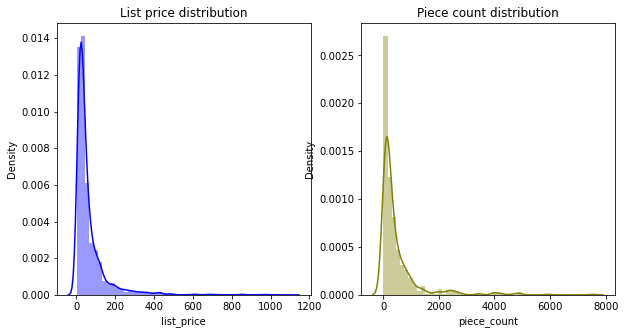

In [74]:
# Check distribution of list_price and piece_count

# Create subplots 
f, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot Histogram plot with list_price
sns.distplot( lego["list_price"] , color="blue", ax=axes[0])

# Plot Histogram plot with peice_count
sns.distplot( lego["piece_count"] , color="olive", ax=axes[1])

a = axes[0].set_title('List price distribution')
b = axes[1].set_title('Piece count distribution')


### Notes:

The two distribution plots above confirm that the data for list_price and piece count are not normally distributed.
This will not be a problem in developing predictive models as linear regression models do not assume that the data is normally distributed.

## 1.3 Visualise relationship between list_price and piece_count

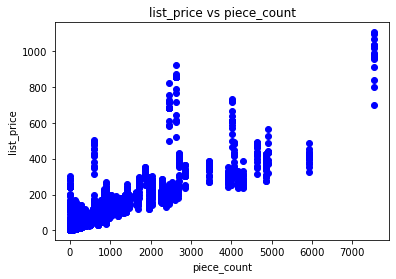

In [40]:
# price/piece_count Visualization
plt.scatter(df['piece_count'], df['list_price'], color = "blue")
plt.title("list_price vs piece_count")
plt.xlabel("piece_count")
plt.ylabel("list_price")

plt.show()

##### Notes:

The trend in the scatter plot shows that there is a general trend of price increasing as piece count increases. However, we can observe that at around 2500-2800 piece count prices are higher when compared to higher piece counts until we get to above 7000 pieces. There is another peak in prices at around 4000 piece_counts. We can infer from this that, even though there is a general trend of price increase with piece count, there are also other factors that determine list price along with piece_count. 

Linear regression models require that the x and y variables used have a somewhat linear relationship and as that is observable in the scatter plot we are able to use these variables to build our model. 



# 2. Simple linear regression

## 2.1 Define the variables

In [76]:
# variables (simple linear regression)
y = lego["list_price"].values.reshape(-1, 1) 
x = lego["piece_count"].values.reshape(-1, 1)
 

## 2.2 Split the data set


I will split the data into to train and test with a split of 70/30.

Splitting the dataset allows for us to test our model against the test sample of the data that was not used to train the model. With this we can test the quality of the model

In [77]:
# split the data into training = 0.7 and testing = 0.3 subsets
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=1)

# 3. Run a simple linear equation

## 3.1 Fit the model

In [78]:
# create an object for the linear regression
lr = LinearRegression()

# fit the model on the training data
lr.fit(x_train, y_train)

# predict is used for predicting on the x_test
y_pred_lr = lr.predict(x_train)

In [80]:
# Predict the training set values.
y_pred = lr.predict(x_train) 

## 3.2 Visualise the model

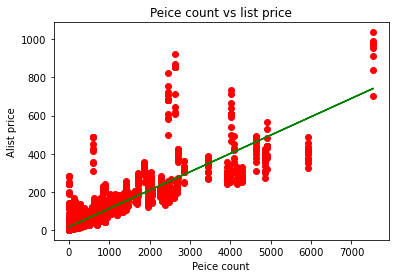

In [82]:
# [1] Create a scatterplot (with red data points).
plt.scatter(x_train, y_train, color = "red")  
# [2] Create a regression line in green.
plt.plot(x_train, y_pred, color = "green")
# [3] Set the title for the graph.  
plt.title("Peice count vs list price")
# [4] Set the label for the x-axis.  
plt.xlabel("Peice count")
# [5] Set the label for the y-axis.   
plt.ylabel("Alist price") 
# [6] Print the graph. 
plt.show() 

## 3.2 Model Evaluation

In [9]:
# Print intercept and coffecient values
print("Intercept value: ", lr.intercept_)
print("Coffecient value: ", lr.coef_)

Intercept value:  [17.51265789]
Coffecient value:  [[0.09609344]]


In [79]:
# simple linear regression MAE, MSE, R squared.

meanAbErr = metrics.mean_absolute_error(y_train, y_pred_lr)
meanSqErr = metrics.mean_squared_error(y_train, y_pred_lr)

print('R squared: {:.2f}'.format(lr.score(x_train,y_train)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

R squared: 75.70
Mean Absolute Error: 20.084732177020527
Mean Square Error: 1934.1469402177052


#### Notes:
- The R-squared tells us that the model is explaining over 75.70% of the values. This suggests that this a relatively strong model

- The coffecient value of 0.096 tells us that as the independent variable increases by 1, the predicted value of list_price increases by 0.096.

- The Mean Absolute Error indicates that the average risidual error in the predicted price is relatively low at 20.08.

## 3.4 Simple linear regression prediction

We will now use the linear regression  model to predict the list price of Lego product with 8000 pieces.


In [11]:
# Predicted list price when the lego set has 8000 pieces
print(lr.predict([[8000]]))

[[786.26020805]]


 #### Notes: 
 
 The model predicts that the price for a lego set with 8000 pieces is $786.26

## 5. Multiple linear regression

## 5.1 Define the variables

In [89]:
# variables (multiple linear regression)
y = lego["list_price"]
X = lego[["piece_count","ages"]]

### 5.2 Split the data set

In [90]:
# split the data into training = 0.7 and testing = 0.3 subsets
X_train, x_test, y_train,y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

### 5.3 Fit the multiple linear regression

In [91]:
# run linear regression
mlr = linear_model.LinearRegression()

# fit the model on the training data
mlr.fit(X_train, y_train)

# predict is used for predicting on the x_test
y_pred_mlr = mlr.predict(X_train)

### 5.4 Evaluate the model

In [87]:
# Print model intercept and coffecients
print("Intercept value: ", mlr.intercept_)
print("Coffecient value: ", mlr.coef_)

Intercept value:  16.80346232870125
Coffecient value:  [0.09613004 0.04135372]


In [98]:
# check multicollinearity
x_temp = sm.add_constant(x_train)# multicollinearity

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

   VIF Factor     features
0         5.8        const
1         1.0  piece_count
2         1.0         ages


### Notes:

A VIF a value of 1 in shows that there is no evidence of multicollinearity in the model and thus no correlation between the two independent variables used.

In [93]:
meanAbErr = metrics.mean_absolute_error(y_train, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_train, y_pred_mlr)

print('R squared: {:.2f}'.format(mlr.score(X_train,y_train)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

R squared: 75.70
Mean Absolute Error: 20.076668286657355
Mean Square Error: 1934.0328139196909


#### Notes:

- The R-squared tells us that the model is explaining over 75.69% of the values.
- The coffecient value of 0.096 for the pieces_count tells us that as this independent variable increases by 1, the predicted value of list_price increases by 0.096. 
- As the second independent variable increases by 1 the prices increases by 0.04
- The Mean Absolute Error for this model is 20.07 which is low.

### 5.5 multiple linear regression prediction

We will now use the MLR model to predict the list price of Lego product with 8000 pieces.


In [94]:
New_Value1 = 8000
New_Value2 = 30
print ('Predicted Value: \n', mlr.predict([[New_Value1 ,New_Value2]])) 

Predicted Value: 
 [787.08439325]


#### Notes:

In summary:

The model predicts that lego products with 8000 pieces most likley purchased by 30 year olds will cost $787.08.

The predicted price for an 8000 piece lego set using simple linear regression is 786.26 dollars and 787.08 dollars when using a MLR model with age and piece count as the independent variables.

Both models have an accuracy of 75.70 percent and a low Mean Absolute Error of 20.08 and 20.076 respectivly. Considering these evaluation results I am confident that the recommended price is the most suitable based on the analysis.



